<span>
<img src="http://ndlib.readthedocs.io/en/latest/_static/ndlogo2.png" width="260px" align="right"/>
</span>
<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  >=3.6<br/>
<b>NDlib version:</b>  5.1.0<br/>
<b>Last update:</b> 16/02/2021
</span>

<a id='top'></a>
# *Chapter 13: Epidemics*

In this notebook are introduced basilar versions of the SI/SIS/SIR models: for more advanced customizations refer to the ``NDlib`` documentation/appendix notebook.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

## Table of Contents

1. [SI(S|R) models](#workflow)
    1. [SI: Susceptible-Infected](#si)
    2. [SIS: Susceptible-Infected-Susceptible](#sis)
    3. [SIR: Susceptible-Infected-Removed](#sir)
2. [Available Epidemic models](#models)

In [1]:
import ndlib

<a id='workflow'></a>
## SI(S|R) models ([to top](#top))

``Ndlib`` breaks the simulation of diffusive phenomena into a standard workflow:
- Network Creation
- Diffusion model Selection and Configuration
- Simulation execution
- Results visualisation

In this section we will observe how to templating such workflow describing simple *SI/SIS/SIR* simulations.

<img src="img/sir.png"/>

In [9]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

g = nx.erdos_renyi_graph(1000, 0.1)

<a id="si"></a>
### SI: Susceptible-Infected ([to top](#top))

Each individual has β contacts with randomly chosen others individuals per unit time.

If there are I infected individual and S susceptible individuals, the average rate of new infection is βsi/N


In [10]:
model = ep.SIModel(g)

In [11]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [12]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter("percentage_infected", 0.01)
model.set_initial_status(cfg)

In [13]:
iterations = model.iteration_bunch(100, node_status=True)
trends = model.build_trends(iterations)

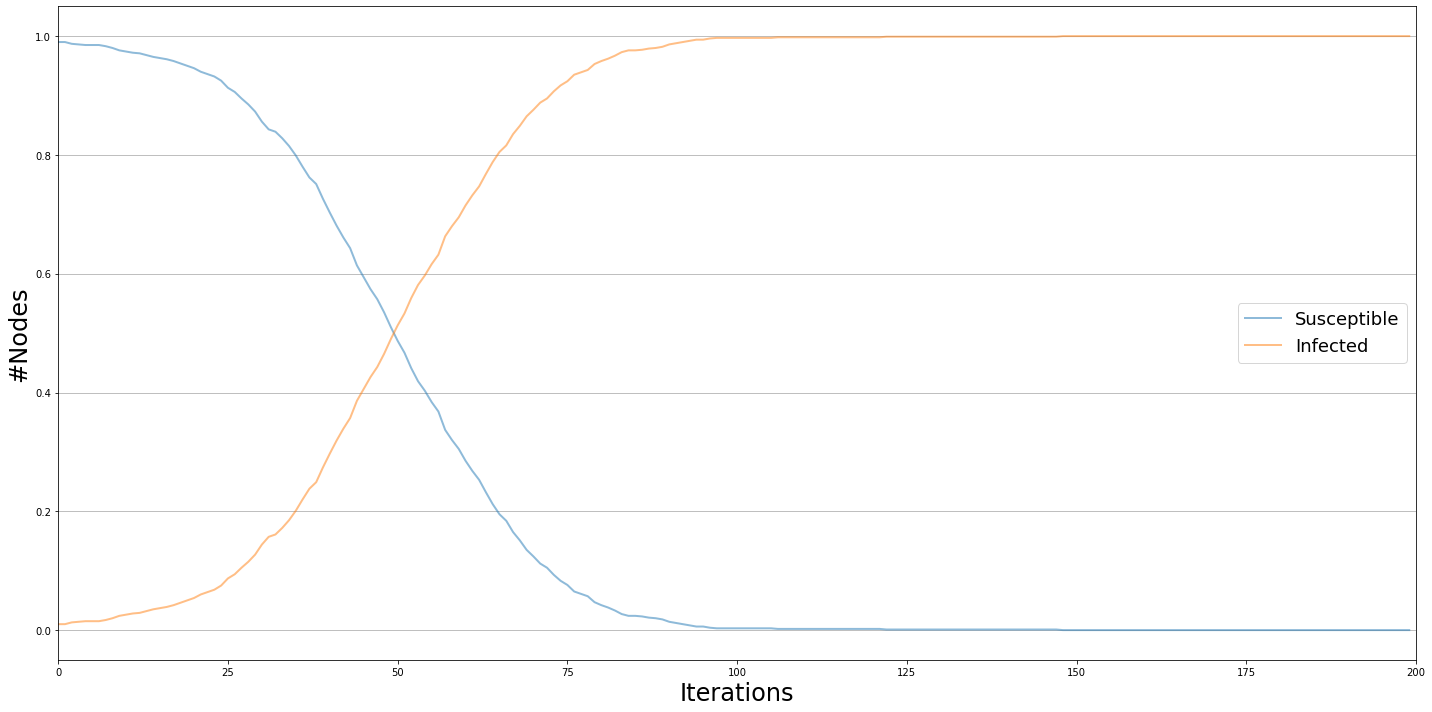

In [16]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

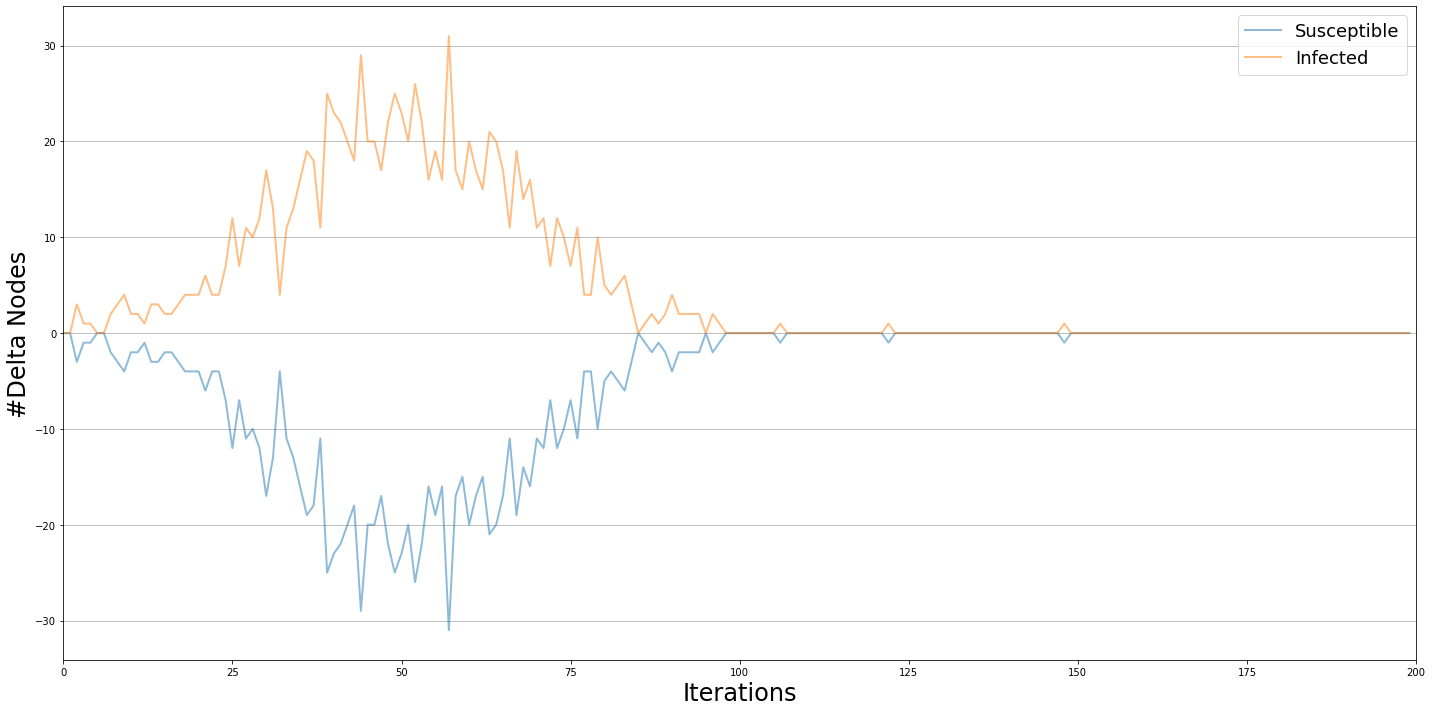

In [17]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

<a id="sis"></a>
### SIS: Susceptible-Infected-usceptible ([to top](#top))

Each individual has β contacts with randomly chosen others individuals per unit time.

Each infected individual has μ probability of revert its status to susceptible.

In [19]:
model = ep.SISModel(g)

In [20]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [21]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter('lambda', 0.005) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model.set_initial_status(cfg)

In [22]:
iterations = model.iteration_bunch(100, node_status=True)
trends = model.build_trends(iterations)

100%|██████████| 100/100 [00:00<00:00, 110.30it/s]


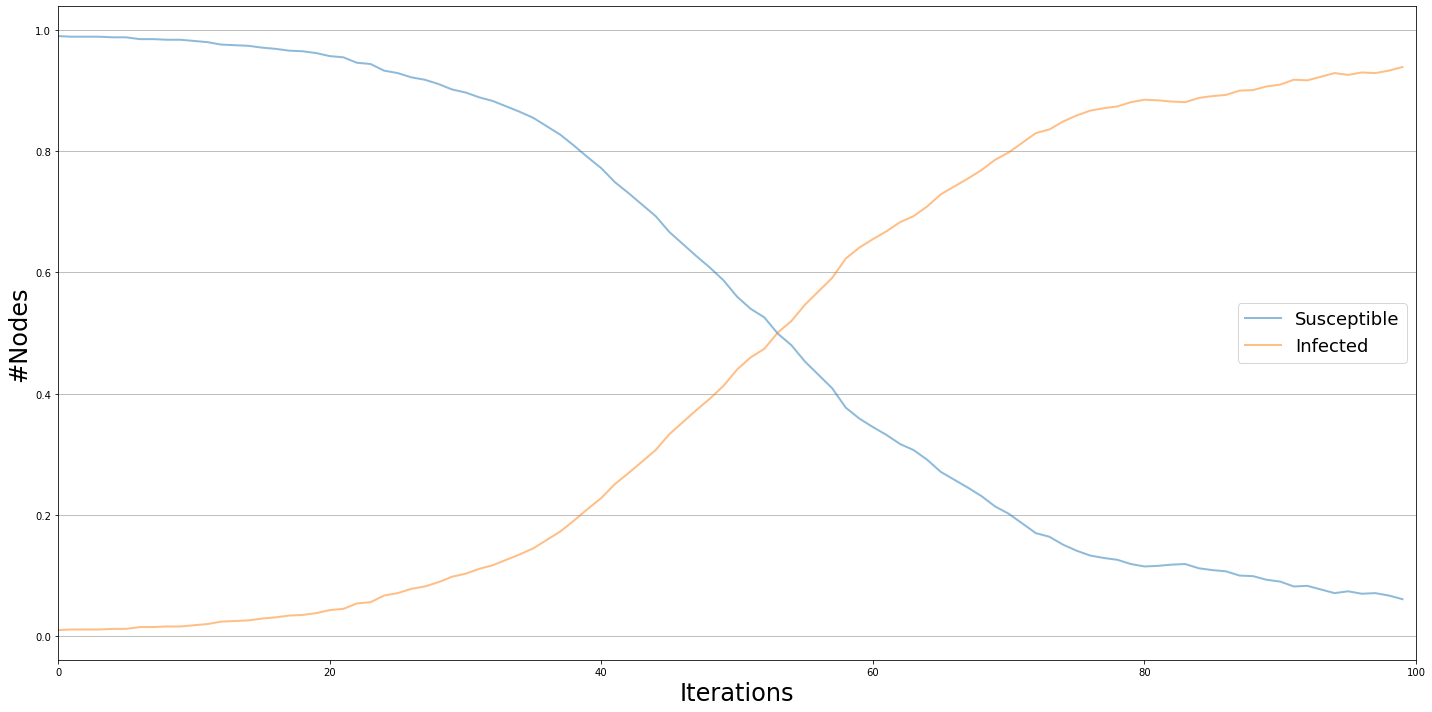

In [23]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

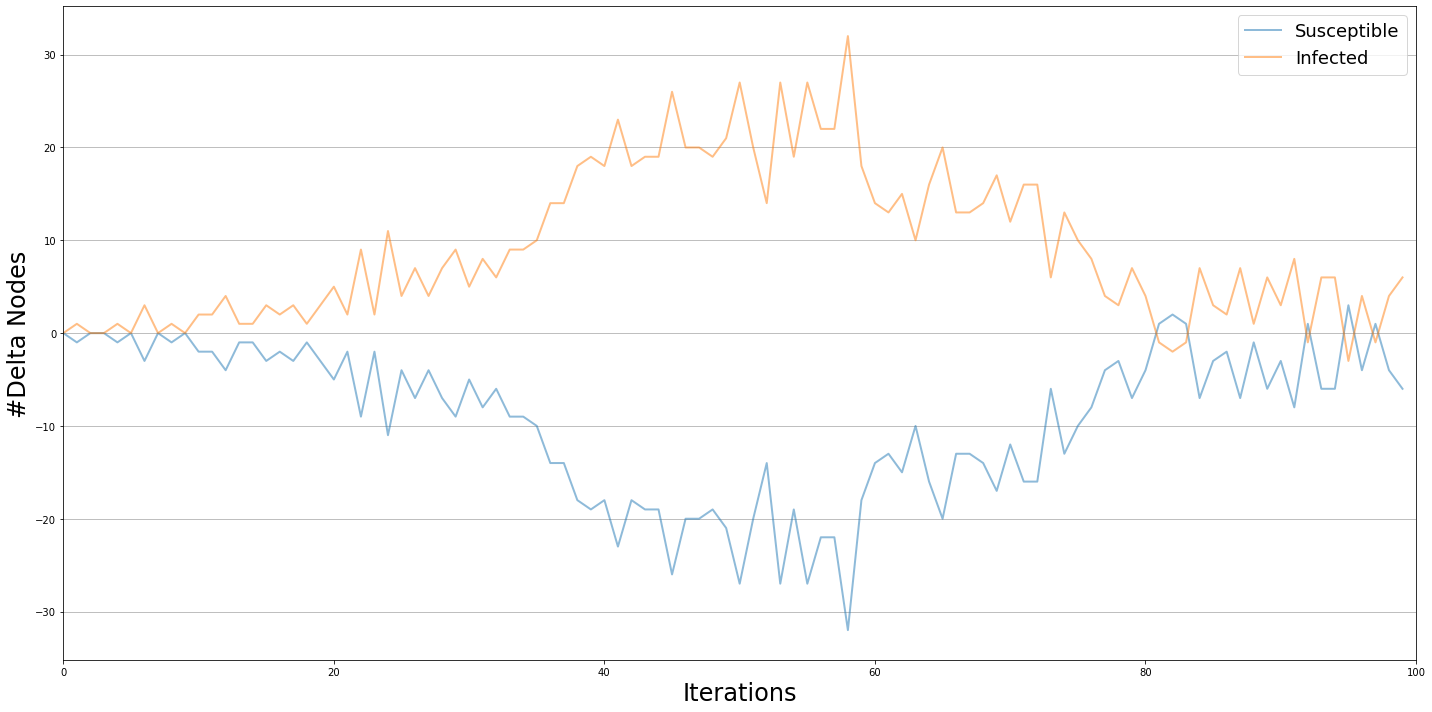

In [24]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

<a id="sir"></a>
### SIR: Susceptible-Infected-Recovered ([to top](#top))

Each individual has β contacts with randomly chosen others individuals per unit time.

Each infected individual has μ probability of becoming immune after being infected.


In [45]:
model = ep.SIRModel(g)

In [46]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}

In [47]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter('gamma', 0.01) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model.set_initial_status(cfg)

In [48]:
iterations = model.iteration_bunch(200, node_status=True)
trends = model.build_trends(iterations)

100%|██████████| 200/200 [00:01<00:00, 132.13it/s]


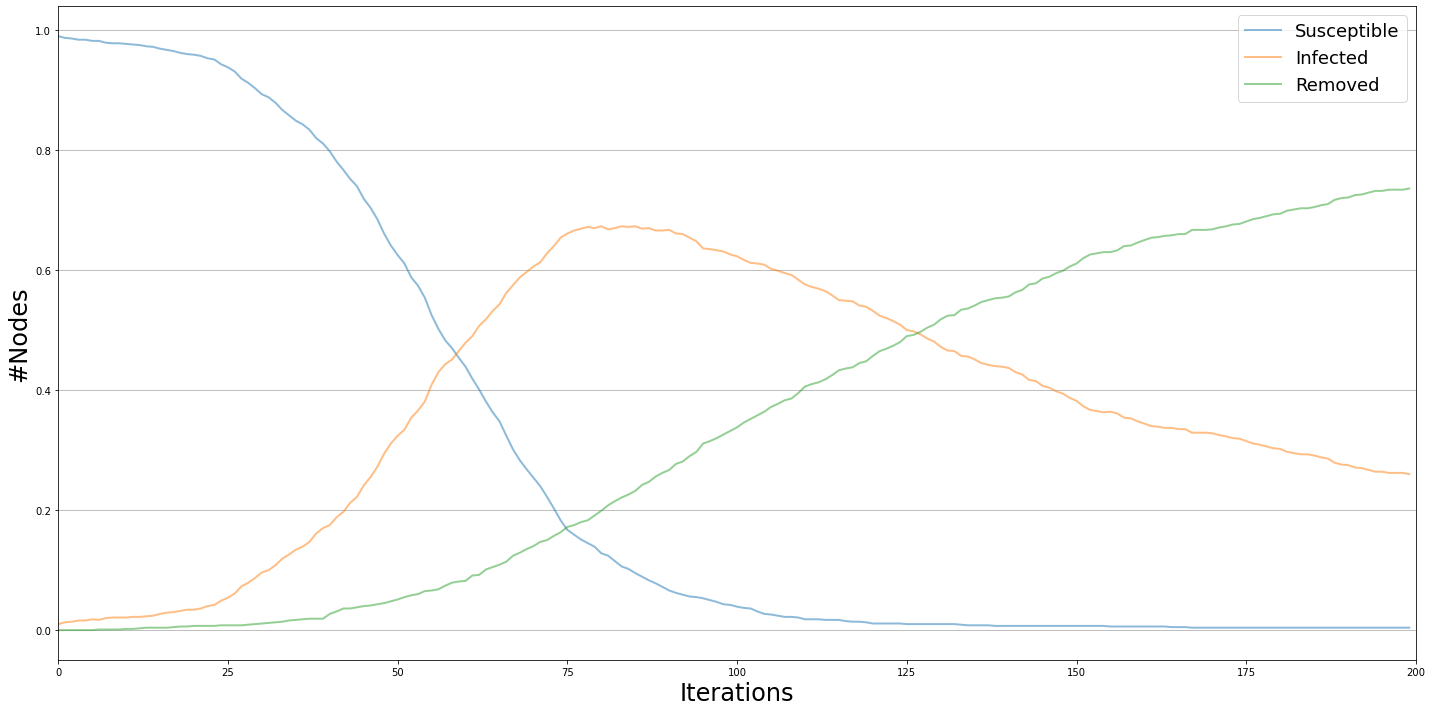

In [49]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

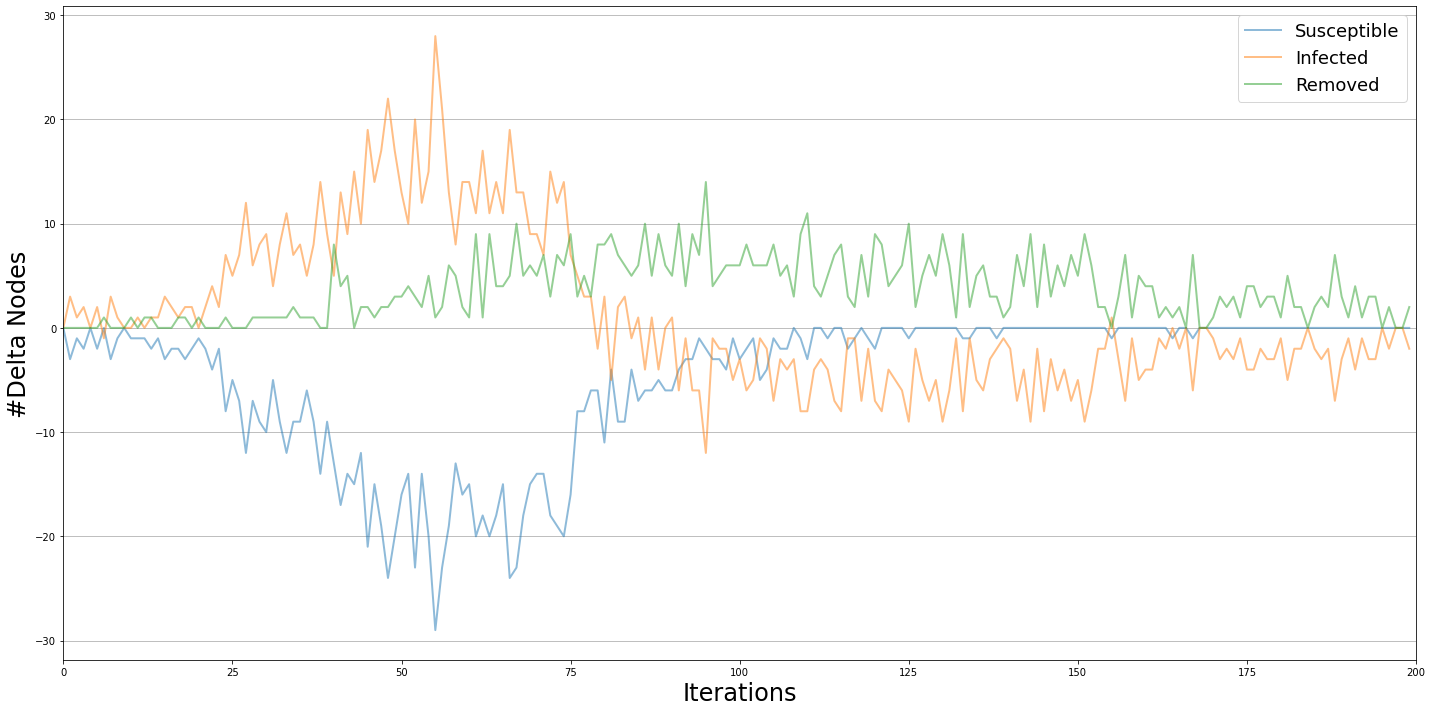

In [50]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

<a id="models"></a>
### Available models ([to top](#top))

When we talk about epidemics, we think about contagious diseases caused by biological pathogens, like influenza, measles, chickenpox and sexually transmitted viruses that spread from person to person. 

Several elements determine the patterns by which epidemics spread through groups of people: the properties carried by the pathogen (its contagiousness, the length of its infectious period and its severity), the structure of the network as well as the mobility patterns of the people involved. 

In ``NDlib`` are implemented the following 12 Epidemic models:

<table>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIm.html'>SI</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIS.html'>SIS</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIR.html'>SIR</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SEIR.html'>SEIR</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SEIS.html'>SEIS</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SWIR.html'>SWIR</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/Threshold.html'>Threshold</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/GeneralisedThreshold.html'>Generalised Threshold</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/KThreshold.html'>Kertesz Threshold</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/Profile.html'>Profile</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/ProfileThreshold.html'>Profile-Threshold</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/IndependentCascades.html'>Independent Cascades</a></td>
    </tr>
</table>